In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df1 = pd.read_csv("./data/df_final.csv")
df2 = pd.read_csv("./data/df_reorganizado.csv")

In [17]:
# GASTO TURÍSTICO TOTAL POR CCAA ENTRE 2019 Y 2025

C:\Users\nmart\AppData\Local\Temp\ipykernel_13056\1199040782.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gasto, x="Gasto", y="CCAA", palette="Blues")


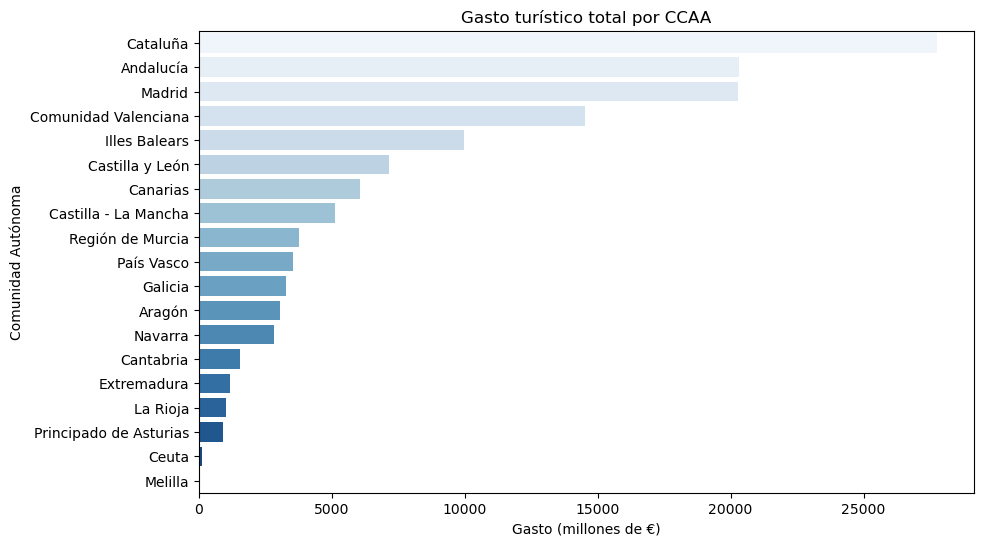

In [31]:
plt.figure(figsize=(10, 6))

df_gasto = df1.groupby("CCAA", as_index=False)["Gasto"].sum()
df_gasto["Gasto"] = df_gasto["Gasto"] / 1_000_000 
df_gasto = df_gasto.sort_values("Gasto", ascending=False)

sns.barplot(data=df_gasto, x="Gasto", y="CCAA", palette="Blues")

plt.title("Gasto turístico total por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Gasto (millones de €)")
plt.show()

In [32]:
# TOP 5 COMUNIDADES SEGÚN GASTO TURISTA

C:\Users\nmart\AppData\Local\Temp\ipykernel_13056\3141051530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_gasto, x="Gasto", y="CCAA", palette="Blues")


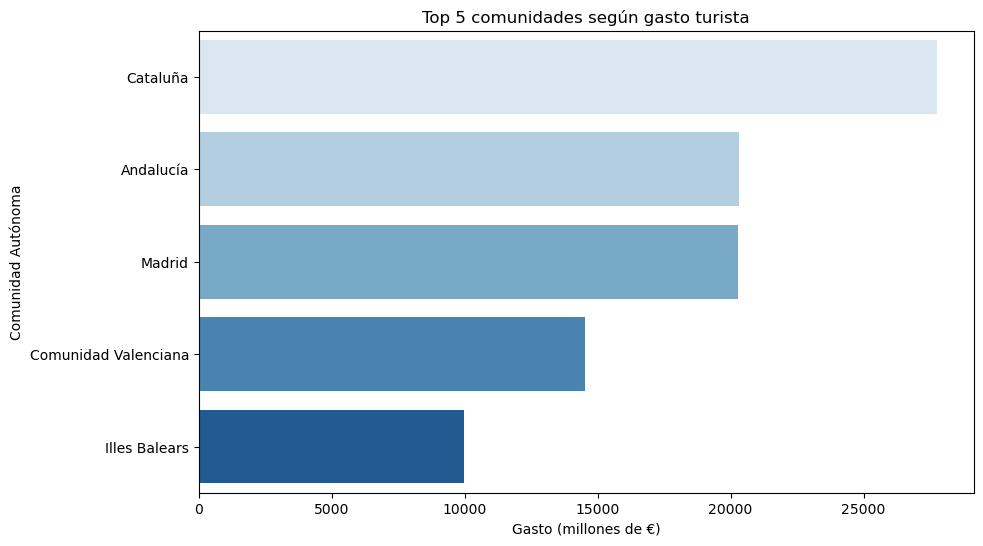

In [33]:
plt.figure(figsize=(10, 6))
top5_gasto = df_gasto.head(5)

sns.barplot(data=top5_gasto, x="Gasto", y="CCAA", palette="Blues")

plt.title("Top 5 comunidades según gasto turista")
plt.xlabel("Gasto (millones de €)")
plt.ylabel("Comunidad Autónoma")
plt.show()

In [34]:
# GASTO TURÍSTICO ANUAL POR CCAA

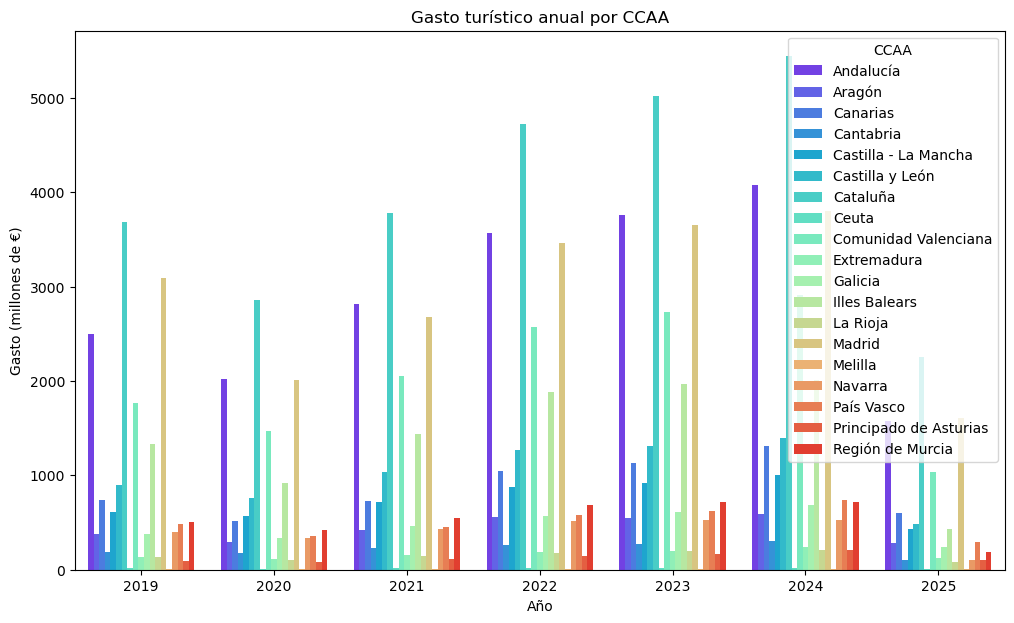

In [35]:
df1_gasto_real = df1.copy()
df1_gasto_real["Gasto"] = df1_gasto_real["Gasto"] / 1_000_000

plt.figure(figsize=(12, 7))

sns.barplot(
    x="Año",
    y="Gasto",
    hue="CCAA",
    data=df1_gasto_real,
    palette="rainbow")

plt.title("Gasto turístico anual por CCAA")
plt.ylabel("Gasto (millones de €)")
plt.xlabel("Año")
plt.legend(title="CCAA")
plt.savefig("grafico.png", dpi=150)   # GUARDAR GRÁFICO PARA LA PARTE 5
plt.show()

In [36]:
# TUSITAS INTERNACIONALES Y NACIONALES POR COMUNIDADES ENTRE 2019 Y 2025

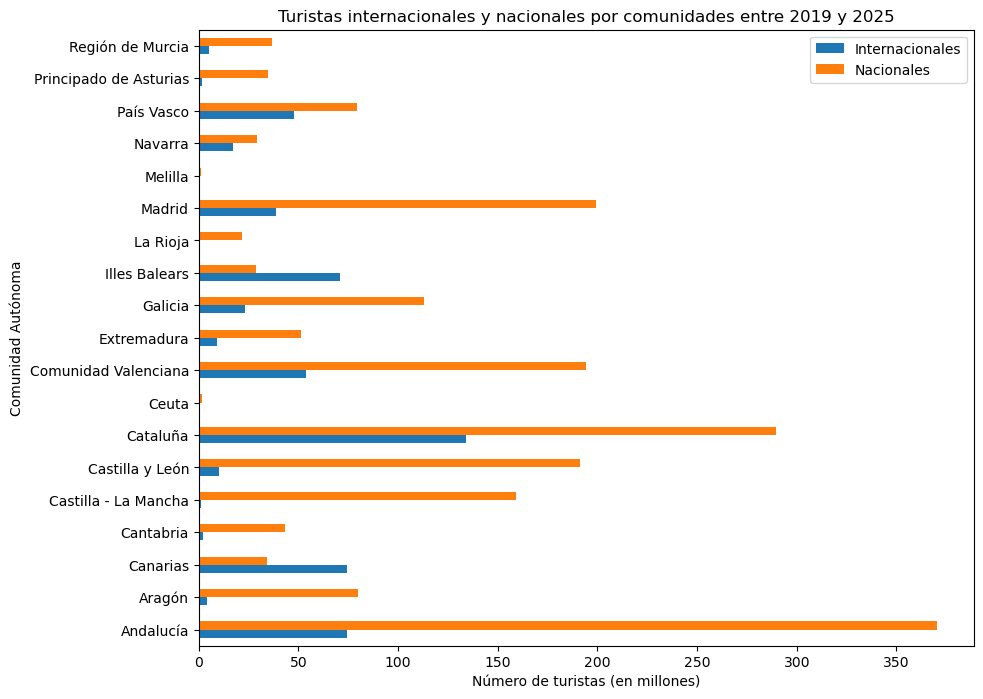

In [37]:
turistas_ccaa = df1.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales"]].sum()
turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]] = turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]] / 1_000_000
turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]].plot(
    kind="barh",
    figsize=(10,8),
    title="Turistas internacionales y nacionales por comunidades entre 2019 y 2025",
    xlabel="Número de turistas (en millones)",
    ylabel="Comunidad Autónoma")
plt.legend(["Internacionales", "Nacionales"])
plt.show()

In [38]:
# TOP 5 COMUNIDADES SEGÚN NÚMERO DE TURSITAS (ORDENADAS)

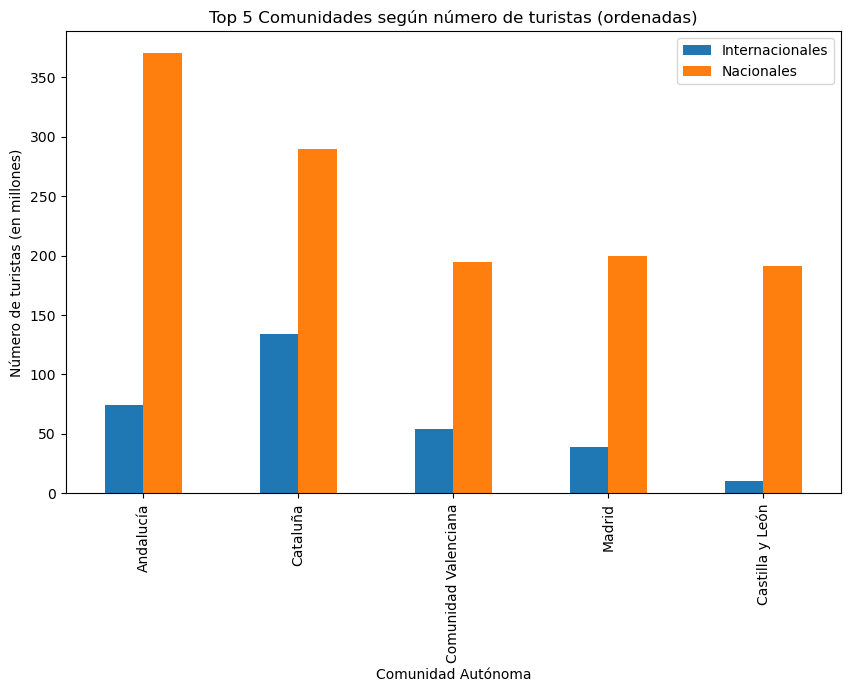

In [39]:
turistas_ccaa['Turistas_Totales'] = turistas_ccaa['Turistas_Internacionales'] + turistas_ccaa['Turistas_Nacionales']
ccaa_top5 = turistas_ccaa.sort_values(by='Turistas_Totales', ascending=False).head(5)

ccaa_top5[['Turistas_Internacionales', 'Turistas_Nacionales']].plot(
    kind='bar',
    figsize=(10,6),
    title="Top 5 Comunidades según número de turistas (ordenadas)",
    ylabel="Número de turistas (en millones)",
    xlabel="Comunidad Autónoma")

plt.legend(["Internacionales", "Nacionales"])
plt.savefig("grafico1.png", dpi=155)    # GUARDAR GRÁFICO PARA LA PARTE 5
plt.show()

In [40]:
# DATOS TOTALES DE TURISMO POR TIPO DE TURISTAS EN GRÁFICO DE PASTEL

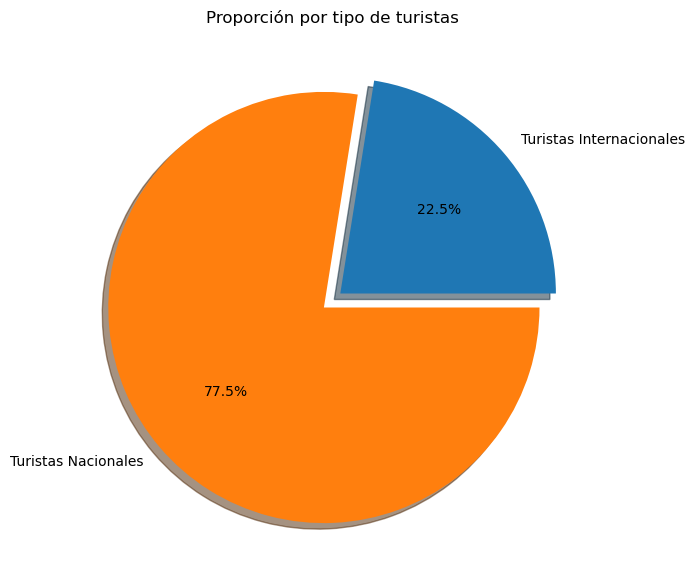

In [41]:
total_turistas = turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]].sum()
total_turistas.plot.pie(
    shadow=True,
    labels=["Turistas Internacionales", "Turistas Nacionales"],
    autopct="%1.1f%%",
    explode=[0.05, 0.05],
    figsize=(7,7))

plt.title("Proporción por tipo de turistas")
plt.savefig("grafico2.png", dpi=160)   # GUARDAR GRÁFICO PARA LA PARTE 5
plt.show()

In [29]:
# GRÁFICO DE SUBPLOT PARA VER LAS 3 VARIABLES CON LAS QUE ESTAMOS TRABAJANDO ENTRE 2019 y 2025

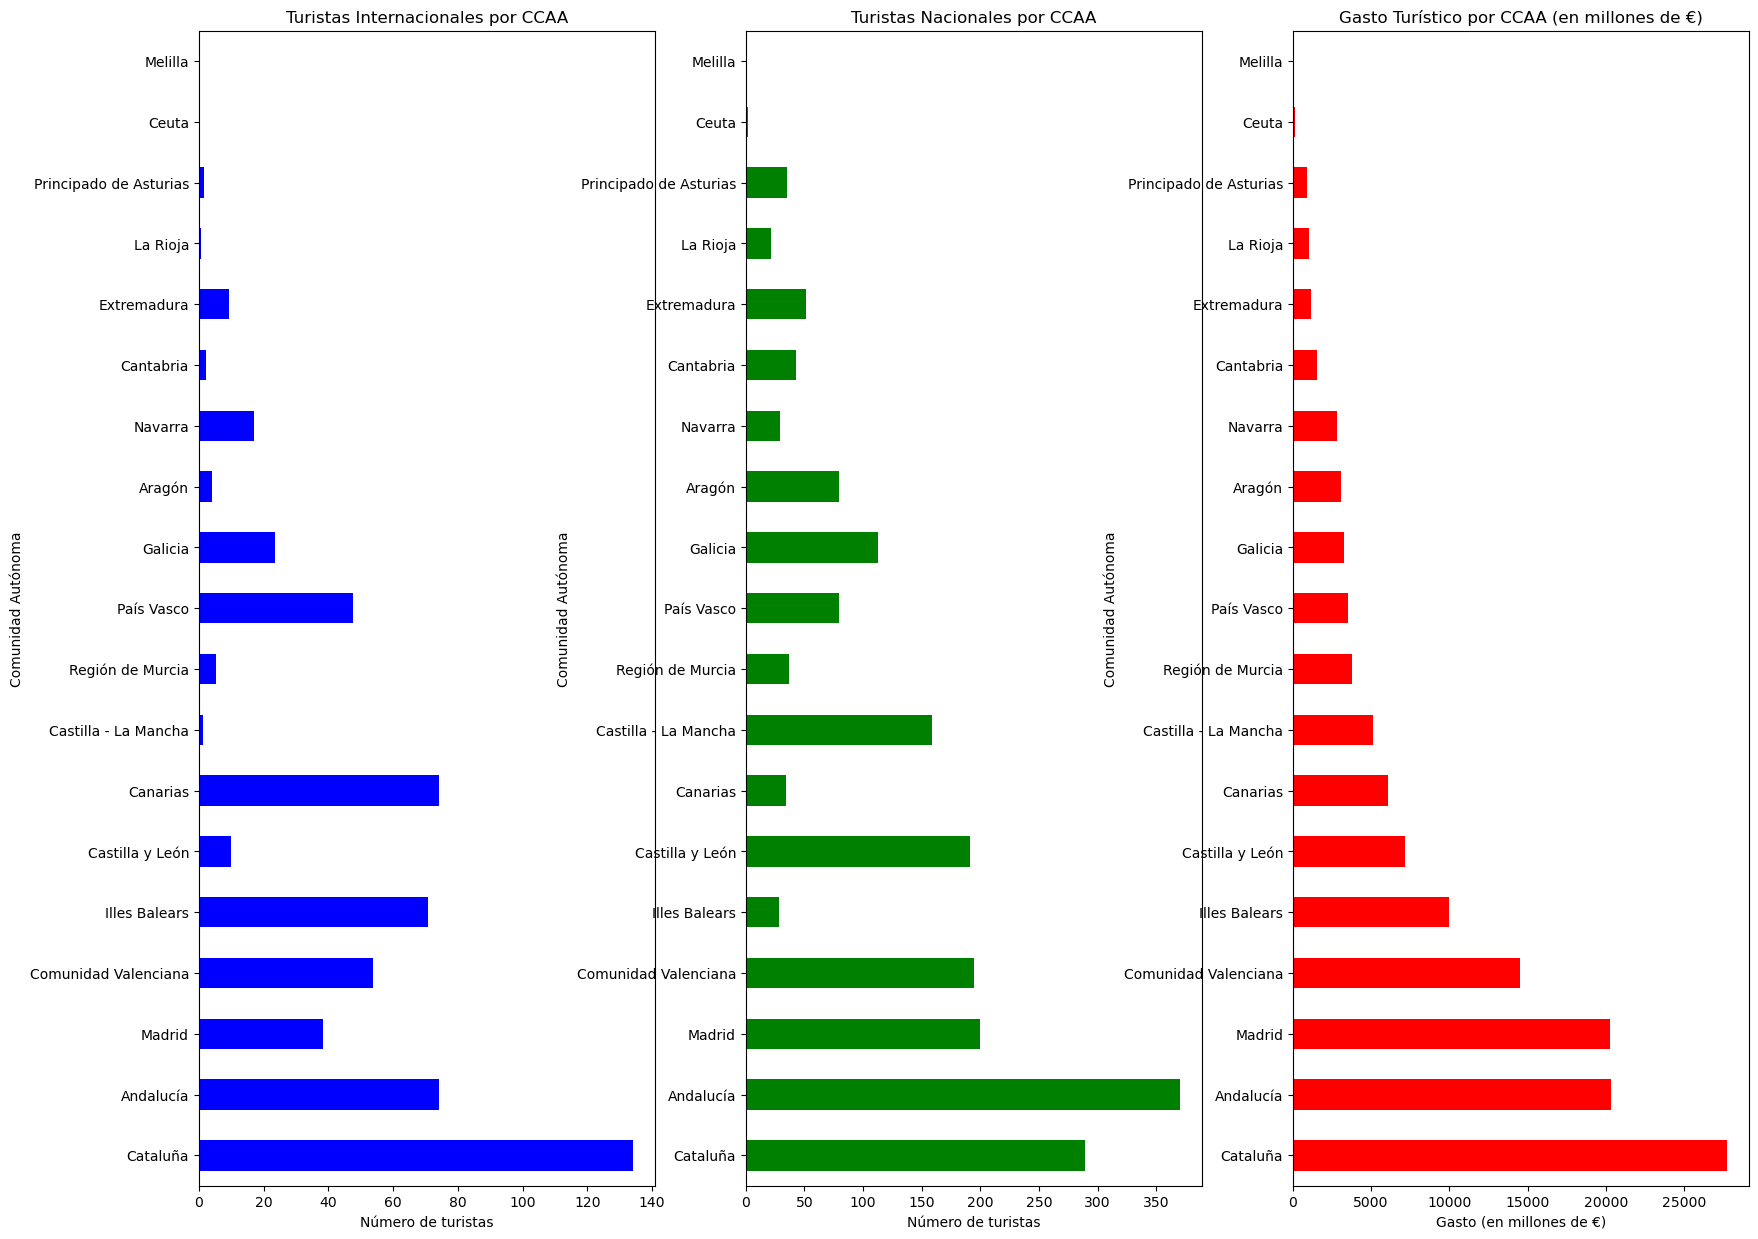

In [30]:
df_conjunta = df1.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales", "Gasto"]].sum()
df_conjunta_real = df_conjunta / 1_000_000
df_conjunta_real = df_conjunta_real.sort_values(by="Gasto", ascending=False)

plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
df_conjunta_real["Turistas_Internacionales"].plot(kind="barh", color="blue")
plt.title("Turistas Internacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 2)
df_conjunta_real["Turistas_Nacionales"].plot(kind="barh", color="green")
plt.title("Turistas Nacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 3)
df_conjunta_real["Gasto"].plot(kind="barh", color="red")
plt.title("Gasto Turístico por CCAA (en millones de €)")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Gasto (en millones de €)")

plt.show()

In [121]:
# ORDEMOS CADA UNA DE MAYOR A MENOR

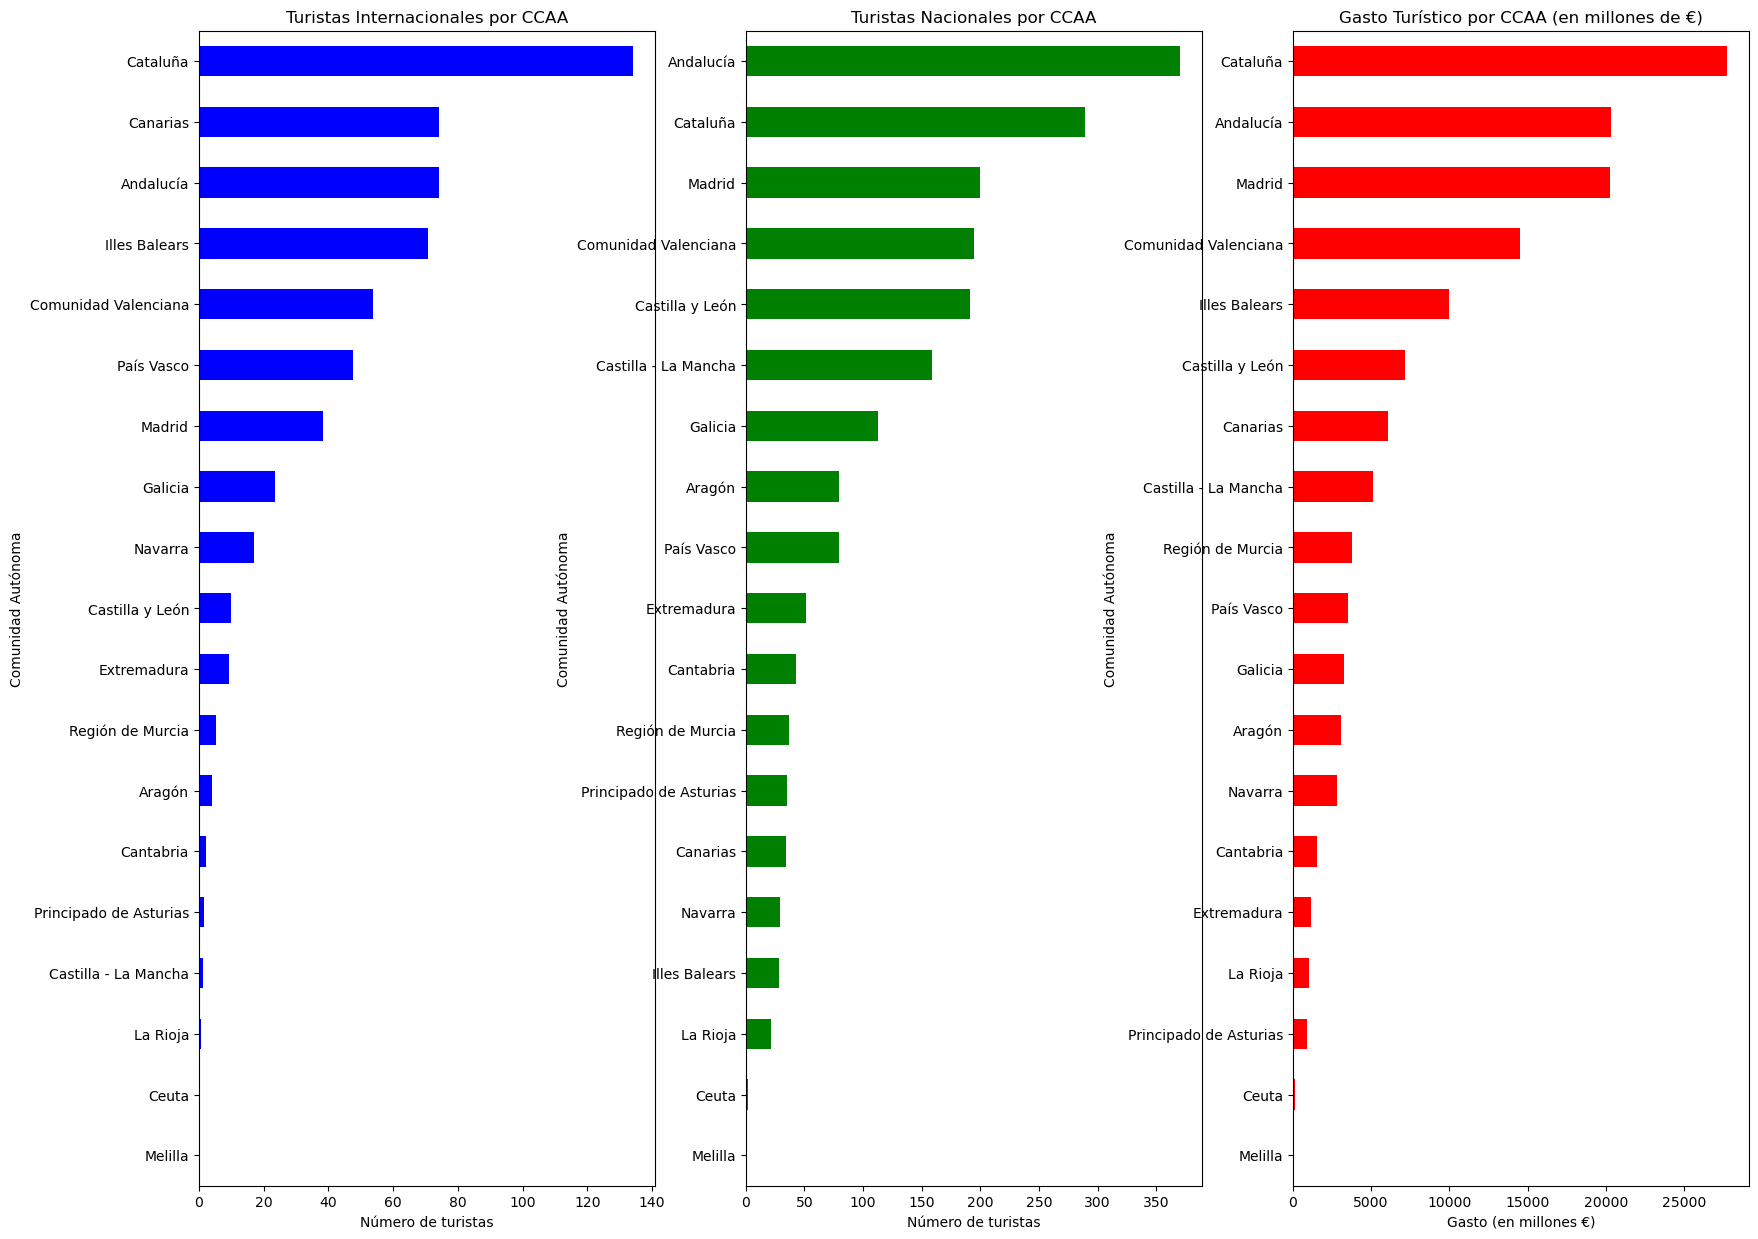

In [122]:
df_conjunta_real = df1.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales", "Gasto"]].sum()
df_conjunta_real = df_conjunta_real / 1_000_000

plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
df_sorted = df_conjunta_real.sort_values(by="Turistas_Internacionales", ascending=True)  # ASCENDING = TRUE PARA QUE SALGAN BARRAS HORIZONTALES
df_sorted["Turistas_Internacionales"].plot(kind="barh", color="blue")
plt.title("Turistas Internacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 2)
df_sorted = df_conjunta_real.sort_values(by="Turistas_Nacionales", ascending=True)
df_sorted["Turistas_Nacionales"].plot(kind="barh", color="green")
plt.title("Turistas Nacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 3)
df_sorted = df_conjunta_real.sort_values(by="Gasto", ascending=True)
df_sorted["Gasto"].plot(kind="barh", color="red")
plt.title("Gasto Turístico por CCAA (en millones de €)")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Gasto (en millones €)")

plt.show()

In [123]:
# EVOLUCIÓN DE TURISTAS INTERNACIONALES POR AÑO EN 4 CCAA EN GRÁFICO DE LINEAS

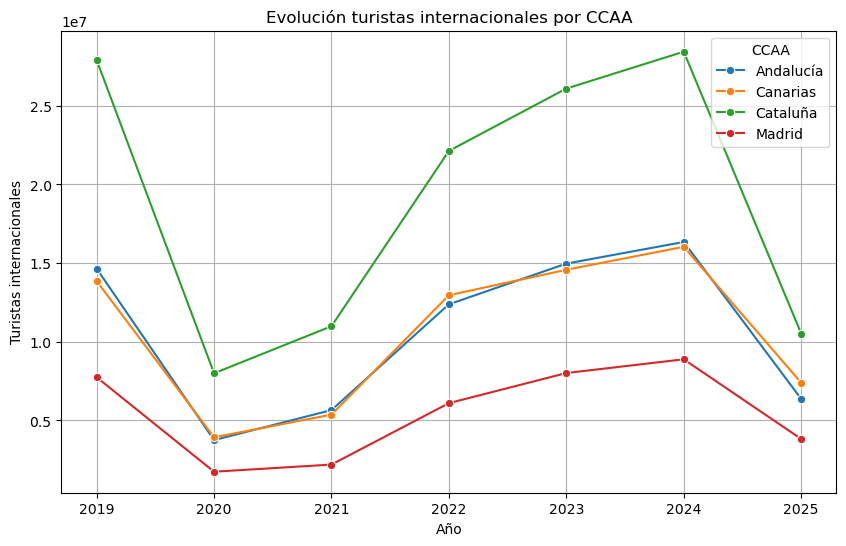

In [124]:
ccaa_elegidas = ["Andalucía", "Cataluña", "Madrid", "Canarias"]

df_lineas = df1[df1["CCAA"].isin(ccaa_elegidas)]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_lineas, x="Año", y="Turistas_Internacionales", hue="CCAA", marker="o")
plt.title("Evolución turistas internacionales por CCAA")
plt.ylabel("Turistas internacionales")
plt.grid(True)
plt.show()

In [125]:
# EVOLUCIÓN DE TURISTAS NACIONALES POR AÑO EN 4 CCAA EN GRÁFICO DE LINEAS

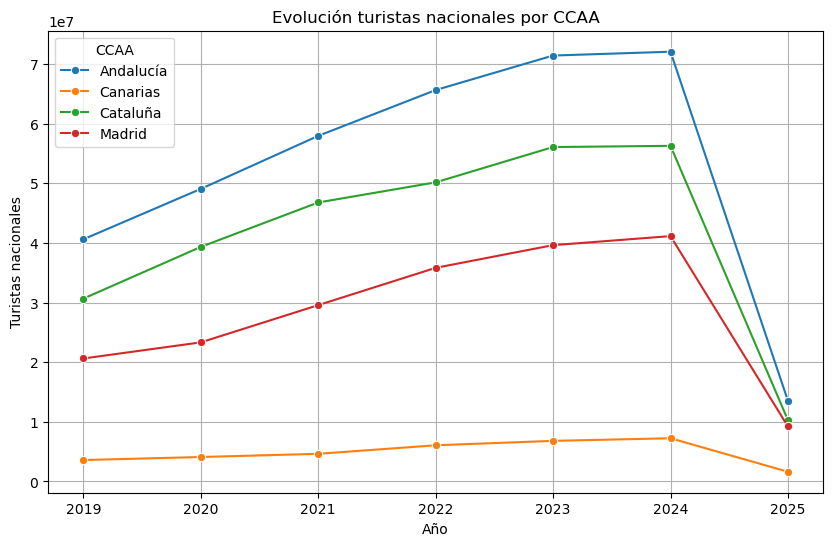

In [126]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_lineas, x="Año", y="Turistas_Nacionales", hue="CCAA", marker="o")
plt.title("Evolución turistas nacionales por CCAA")
plt.ylabel("Turistas nacionales")
plt.grid(True)
plt.show()

In [127]:
# HEATMAP DE CORRELACIONES

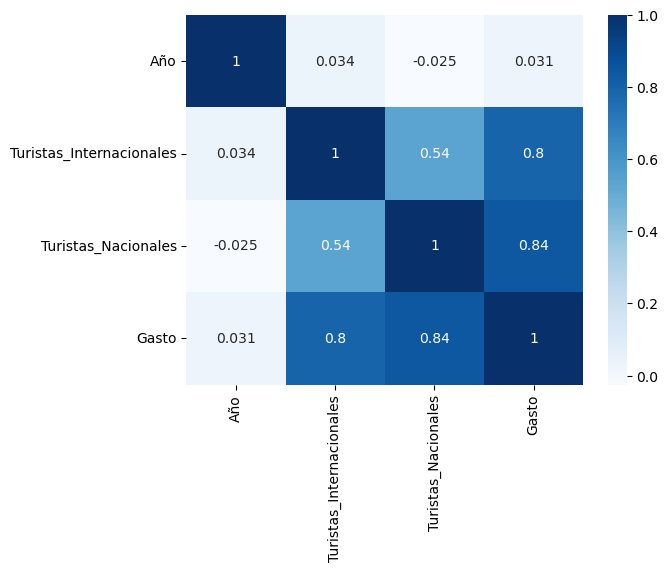

In [128]:
sns.heatmap(data = df1._get_numeric_data().corr(),
            annot = True,
            cmap = "Blues")
plt.show()